# **05 - Football Dataset**
___

#### **Autor/es:**
- Peitsch, Pablo [[1]](#1)

**Fecha:** 2022-09-06

## **DATASETS**
___

### **1. Data exploration**

Luego de importar los paquetes necesarios, se exploran los datasets para su posterior análisis.

In [1]:
# Library imports
library(tidyverse)
# Datasets folder
data_folder <- "datasets"
# Files list of datasets folder
list_files <- list.files(data_folder)
# Number of datasets
n <- length(list_files)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [26]:
# Name list of datasets
d_names <- list()
f_names <- list()
for (i in 1:n){
    f_names[i] <- list_files[i]
    temp_name <- list_files[i]
    temp_name <- tools::file_path_sans_ext(temp_name)
    d_names[i] <- temp_name
    temp_df <- read.csv(file.path(data_folder, f_names[i]), dec=",")
    assign(d_names[[i]], temp_df)
}

In [66]:
# Structure of datasets, data variables and typesa cell in jupyter notebook, we get a nice table with the dataa cell in jupyter notebook, we get a nice table with the data
for (i in 1:n){
    print(d_names[[i]])
    str(get(d_names[[i]]))
    print(colnames(get(d_names[[i]])))
    print("----------")
}

[1] "appearances"
'data.frame':	356513 obs. of  19 variables:
 $ gameID       : int  81 81 81 81 81 81 81 81 81 81 ...
 $ playerID     : int  560 557 548 628 1006 551 654 554 555 631 ...
 $ goals        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ownGoals     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ shots        : int  0 0 0 0 0 0 0 3 3 1 ...
 $ xGoals       : chr  "0" "0" "0" "0" ...
 $ xGoalsChain  : chr  "0" "0.106513060629368" "0.127737730741501" "0.106513060629368" ...
 $ xGoalsBuildup: chr  "0" "0.106513060629368" "0.127737730741501" "0.106513060629368" ...
 $ assists      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ keyPasses    : int  0 1 0 0 0 0 1 0 0 1 ...
 $ xAssists     : chr  "0" "0.106513060629368" "0" "0" ...
 $ position     : chr  "GK" "DR" "DC" "DC" ...
 $ positionOrder: int  1 2 3 3 4 7 7 11 12 13 ...
 $ yellowCard   : int  0 0 0 0 0 0 0 1 0 0 ...
 $ redCard      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ time         : int  90 82 90 90 90 90 61 90 69 90 ...
 $ substituteIn : int  0 222605 0 0 0 0 222606

### **2. Foreign and principal keys**

Se evalúan las claves principales y foráneas en cada dataset; luego, se muestran las imágenes generadas.

In [80]:
# Datasets folder
keys_folder <- "keys"
# Files list of datasets folder
list_pdf <- list.files(keys_folder)
list_pdf

[1] "appearances.jpg" "appearances.pdf" "players.jpg"     "players.pdf"    
[5] "teams.jpg"       "teams.pdf"

<img src="keys/appearances.jpg" alt="appearances"  width="900" height="600">
<img src="keys/players.jpg" alt="players"  width="900" height="600">
<img src="keys/teams.jpg" alt="teams"  width="900" height="600">

## **RELATIONAL DATA**
___

### **1. Los 10 equipos más goleadores**

In [81]:
df_team <- inner_join(teams, teamstats, by="teamID")

In [83]:
str(df_team)

'data.frame':	25360 obs. of  17 variables:
 $ teamID       : int  71 71 71 71 71 71 71 71 71 71 ...
 $ name         : chr  "Aston Villa" "Aston Villa" "Aston Villa" "Aston Villa" ...
 $ gameID       : int  82 91 104 113 129 133 145 152 164 171 ...
 $ season       : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ date         : chr  "2015-08-08 18:00:00" "2015-08-14 22:45:00" "2015-08-22 18:00:00" "2015-08-29 18:00:00" ...
 $ location     : chr  "a" "h" "a" "h" ...
 $ goals        : int  1 0 1 2 2 0 2 0 0 1 ...
 $ xGoals       : chr  "0.782253" "0.219118" "0.765278" "2.27406" ...
 $ shots        : int  7 5 11 21 11 13 10 13 10 9 ...
 $ shotsOnTarget: int  3 1 2 6 4 3 4 2 1 3 ...
 $ deep         : int  2 3 6 12 5 5 2 7 2 4 ...
 $ ppda         : chr  "11.8462" "10.0333" "8.4762" "8.6364" ...
 $ fouls        : int  13 14 15 10 13 10 13 12 17 10 ...
 $ corners      : int  3 3 4 5 5 2 1 9 4 4 ...
 $ yellowCards  : int  4 2 3 2 1 2 0 1 3 2 ...
 $ redCards     : int  0 0 0 0 0 0 

In [128]:
team_goals <- group_by(df_team, teamID) %>% mutate(total_goals=sum(goals)) %>% arrange(desc(total_goals)) %>%
    subset(select=-c(season, gameID, date, location, goals)) %>% distinct(teamID, .keep_all=TRUE)

In [154]:
best_10 <- head(team_goals, 10) %>% arrange(desc(total_goals))

In [155]:
best_10

teamID,name,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result,total_goals
<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
148,Barcelona,1.76141,10,4,5,6.6316,11,4,3,0,W,698
161,Paris Saint Germain,1.33457,7,3,3,11.9,17,2,2,1,W,642
150,Real Madrid,1.54271,27,8,11,6.28,4,5,0,0,D,628
117,Bayern Munich,3.22904,23,9,6,4.1429,10,7,2,0,W,628
88,Manchester City,1.9242,20,7,8,8.087,9,6,1,0,W,620
105,Napoli,1.15002,14,3,3,4.7941,21,1,2,0,L,542
98,Juventus,1.82451,21,5,13,4.0667,14,10,1,0,L,533
87,Liverpool,0.329873,8,3,5,9.3462,16,5,4,0,W,519
129,Borussia Dortmund,2.42013,18,7,7,11.4643,13,3,0,0,W,505


### **2. Gráfica de los 10 equipos más goleadores**

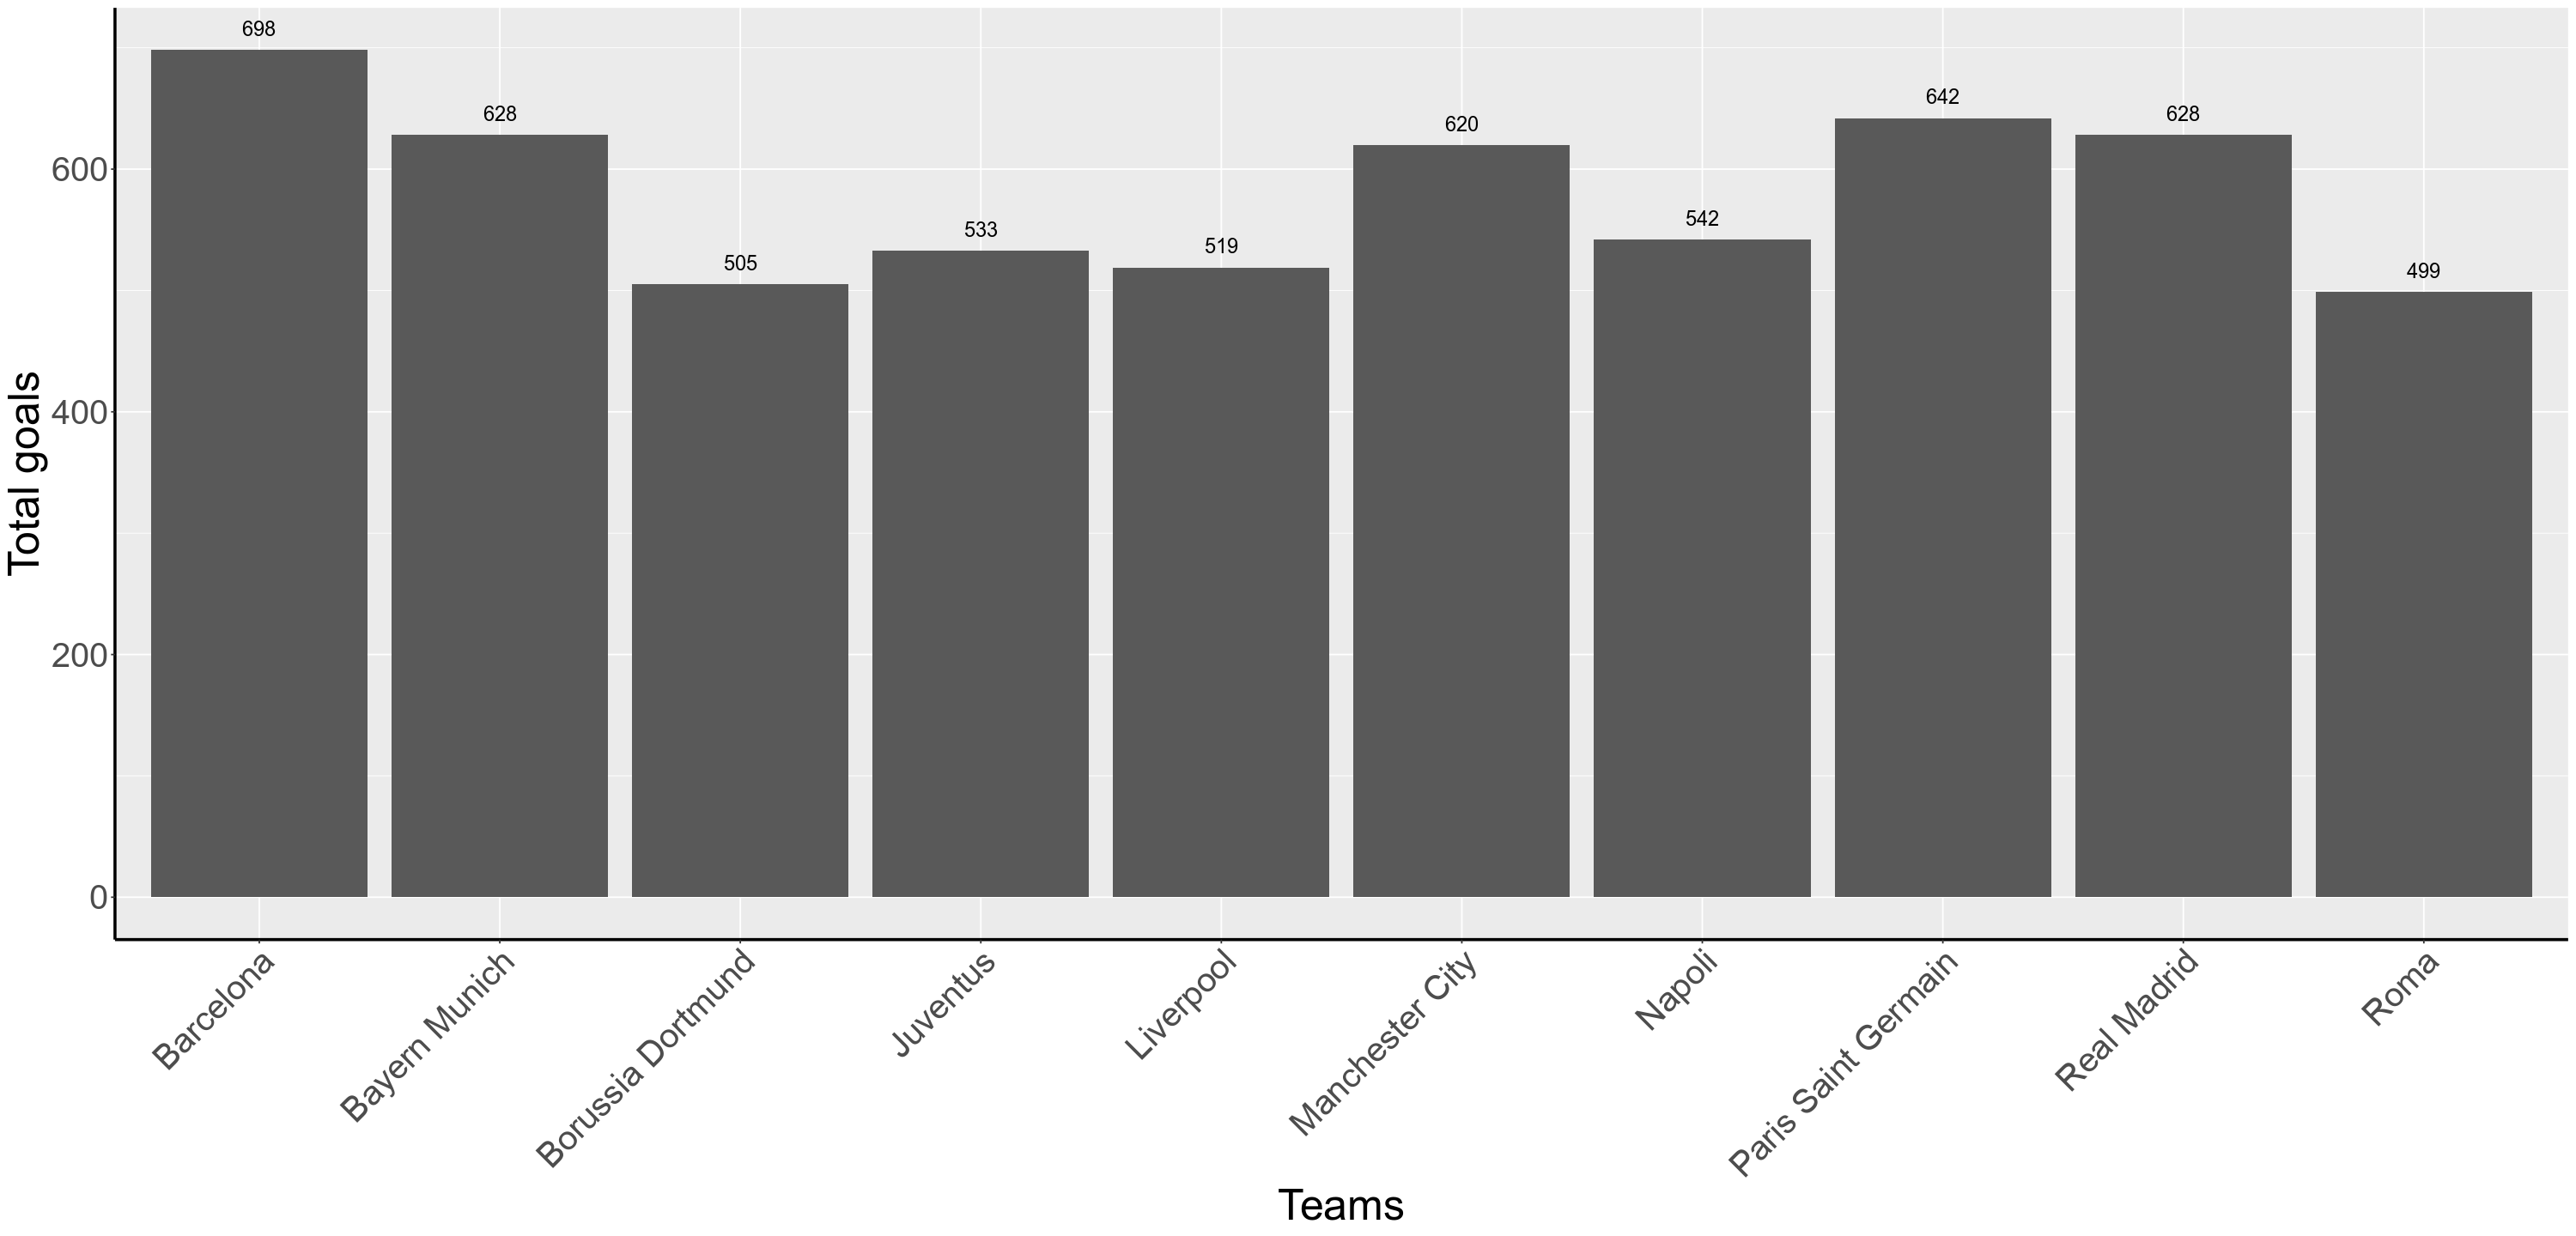

In [177]:
# Se cambia tamaño del plot
options(repr.plot.width=25, repr.plot.height=12)

ggplot(best_10, aes(x=name, y=total_goals)) + 
    geom_bar(stat = "identity") +
    geom_text(aes(label=total_goals),
            vjust=-0.9, 
            color="black", 
            hjust=0.5,
            position = position_dodge(0.9),  
            angle=0, 
            size=5.0
            ) + 
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 30)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    labs(x="Teams", y="Total goals")

### **3. Tiros al arco**

### **4. Scatter plot goles totales y tiros al arco**

### **Datos:**

#### <a id="1"></a> Pablo Peitsch
#### Mis repositorios de Github: <a href="https://github.com/PPeitsch">@PPeitsch</a>
#### Los datasets fueron adquiridos de: <a href="https://www.kaggle.com/datasets/technika148/football-database">Football dataset</a>
#### Información sobre la variable Xstats, Expected Goals (xG):
- <a href="https://understat.com/">understat.com</a>
- <a href="https://onefootball.com/es/noticias/que-son-los-expected-goals-xg-30199741">onefootball.com</a>
